In [ ]:
# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 1000
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')

# Regression

In [ ]:
#Read data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Boston.csv'
                ,index_col=0)
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

# Model building

In [4]:
x = df.iloc[:,:-1]
y = df['medv']

In [5]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [ ]:
#Evaluating regressor

In [6]:
xtest

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
308,0.04932,33.0,2.18,0,0.472,6.849,70.3,3.1827,7,222,18.4,396.90,7.53
344,0.02543,55.0,3.78,0,0.484,6.696,56.4,5.7321,5,370,17.6,396.90,7.18
48,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80
68,0.05789,12.5,6.07,0,0.409,5.878,21.4,6.4980,4,345,18.9,396.21,8.10
363,3.67822,0.0,18.10,0,0.770,5.362,96.2,2.1036,24,666,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.04203,28.0,15.04,0,0.464,6.442,53.6,3.6659,4,270,18.2,395.01,8.16
225,0.31533,0.0,6.20,0,0.504,8.266,78.3,2.8944,8,307,17.4,385.05,4.14
111,0.10793,0.0,8.56,0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00
427,12.24720,0.0,18.10,0,0.584,5.837,59.7,1.9976,24,666,20.2,24.65,15.69


In [7]:
len(xtrain)

404

In [8]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
ypred

array([29.995, 27.216, 19.794, 20.613, 19.757, 19.796, 27.657, 19.285,
       20.522, 23.489, 28.2  , 30.928, 20.514, 20.775, 20.04 , 25.895,
       11.851, 41.411, 23.856, 14.29 , 19.635, 16.554, 24.177, 23.553,
       25.371,  9.164, 14.767, 19.909, 42.843, 12.714, 26.685, 19.901,
       47.628, 15.675, 23.465, 20.603, 15.356, 32.837, 12.726, 20.419,
       24.576, 23.436, 25.194, 15.862, 15.68 , 10.74 , 47.873, 11.702,
       21.948, 19.004, 23.94 , 22.256, 24.735, 20.5  , 10.875, 23.804,
       11.829, 23.444, 18.954, 42.789, 14.695, 26.439, 13.169, 14.756,
       17.937, 32.643, 42.418, 25.275, 21.804, 20.634, 23.938,  6.88 ,
       18.84 , 21.987, 19.863, 20.61 , 44.328, 24.09 , 27.648, 32.568,
       17.686, 20.351, 34.071, 11.696, 24.481, 25.2  , 14.783, 24.488,
       19.821, 16.957, 27.59 , 44.783, 16.417, 20.883, 15.022, 20.432,
       23.924, 23.672, 42.892, 20.857, 16.641, 15.171])

In [9]:
r2_score(ytest,ypred)

0.9135979418345938

In [10]:
print('R2 value :', r2_score(ytest, ypred))

R2 value : 0.9135979418345938


In [11]:
mean_squared_error(ytest,ypred)

8.538889852941178

In [12]:
np.sqrt(mean_squared_error(ytest, ypred))

2.92213789081576

In [13]:
print(f"R2 values: {r2_score(ytest,ypred)}")
print(f"MSE: {mean_squared_error(ytest,ypred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ytest,ypred))}")

R2 values: 0.9135979418345938
MSE: 8.538889852941178
RMSE: 2.92213789081576


In [ ]:
#Visualize the rf

In [14]:
rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=2041079115),
 DecisionTreeRegressor(max_features=1.0, random_state=609060697),
 DecisionTreeRegressor(max_features=1.0, random_state=1287390852),
 DecisionTreeRegressor(max_features=1.0, random_state=1951187462),
 DecisionTreeRegressor(max_features=1.0, random_state=993345773),
 DecisionTreeRegressor(max_features=1.0, random_state=1522392643),
 DecisionTreeRegressor(max_features=1.0, random_state=1050725799),
 DecisionTreeRegressor(max_features=1.0, random_state=1399208643),
 DecisionTreeRegressor(max_features=1.0, random_state=1963786023),
 DecisionTreeRegressor(max_features=1.0, random_state=1656579365),
 DecisionTreeRegressor(max_features=1.0, random_state=1133603892),
 DecisionTreeRegressor(max_features=1.0, random_state=562006907),
 DecisionTreeRegressor(max_features=1.0, random_state=1463587814),
 DecisionTreeRegressor(max_features=1.0, random_state=402592749),
 DecisionTreeRegressor(max_features=1.0, random_state=461765461),


In [15]:
len(rf.estimators_)

100

In [17]:
rf.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=455622110)

In [18]:
x.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

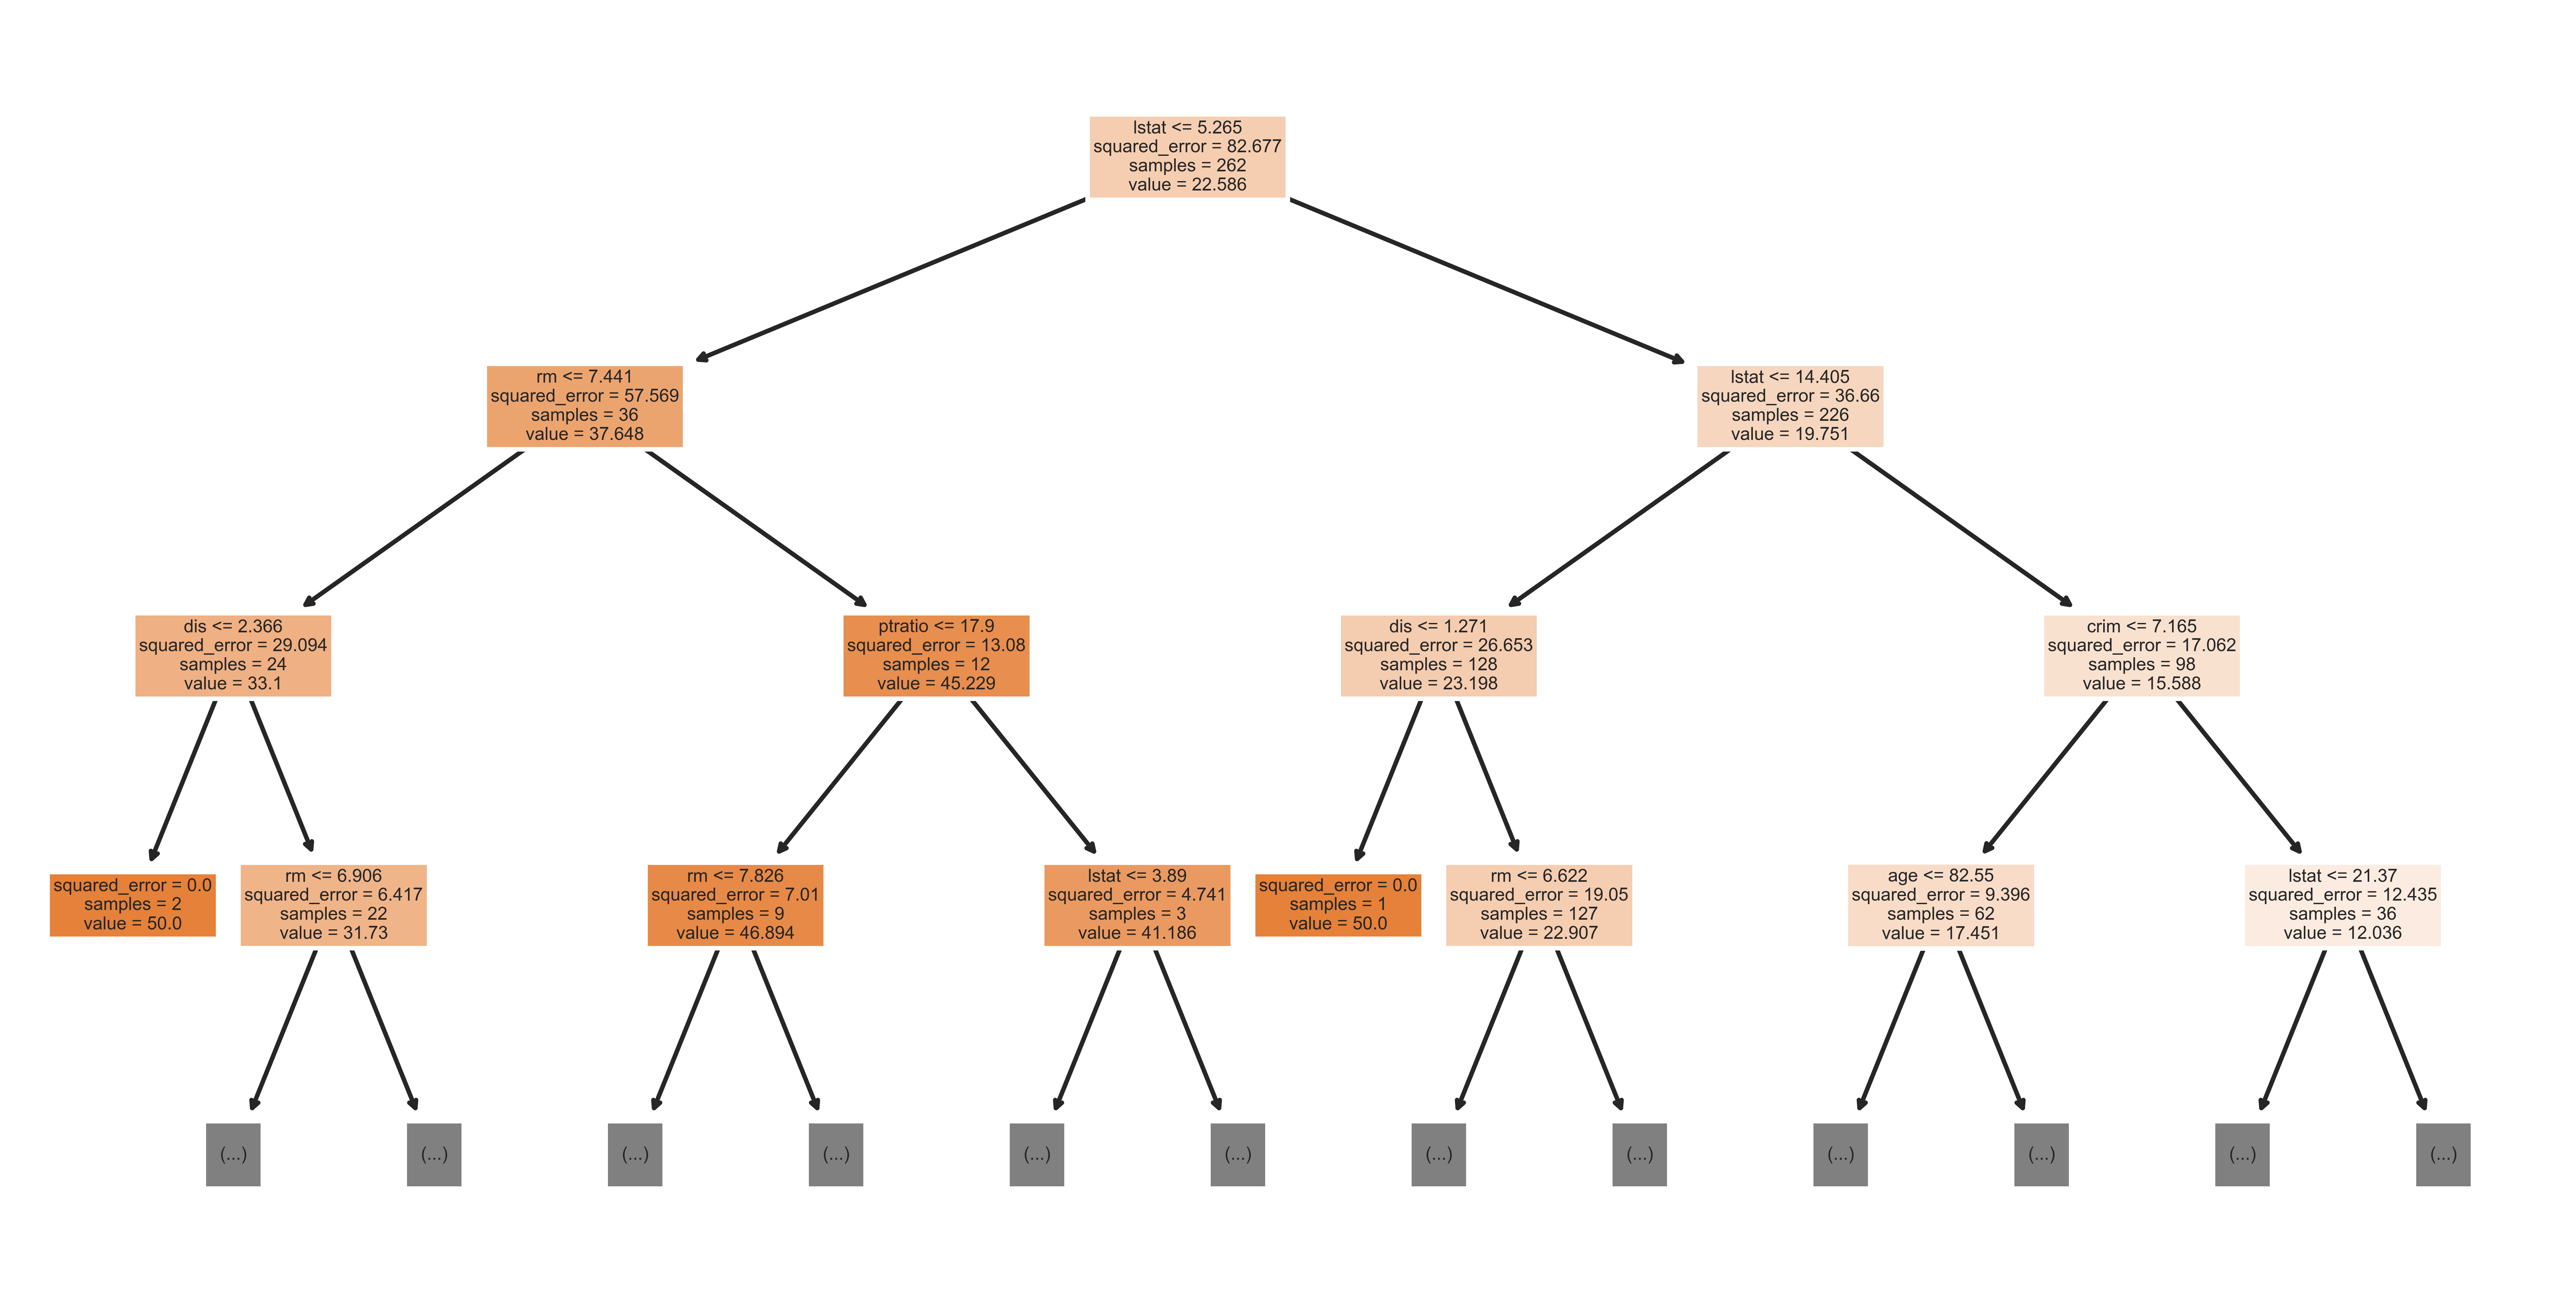

In [22]:
tree.plot_tree(rf.estimators_[85], feature_names=x.columns,
              filled=True, max_depth=3)
plt.show()

# Classification

In [ ]:
#Read the dataset

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Mobile_price_range.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<Axes: xlabel='price_range', ylabel='count'>

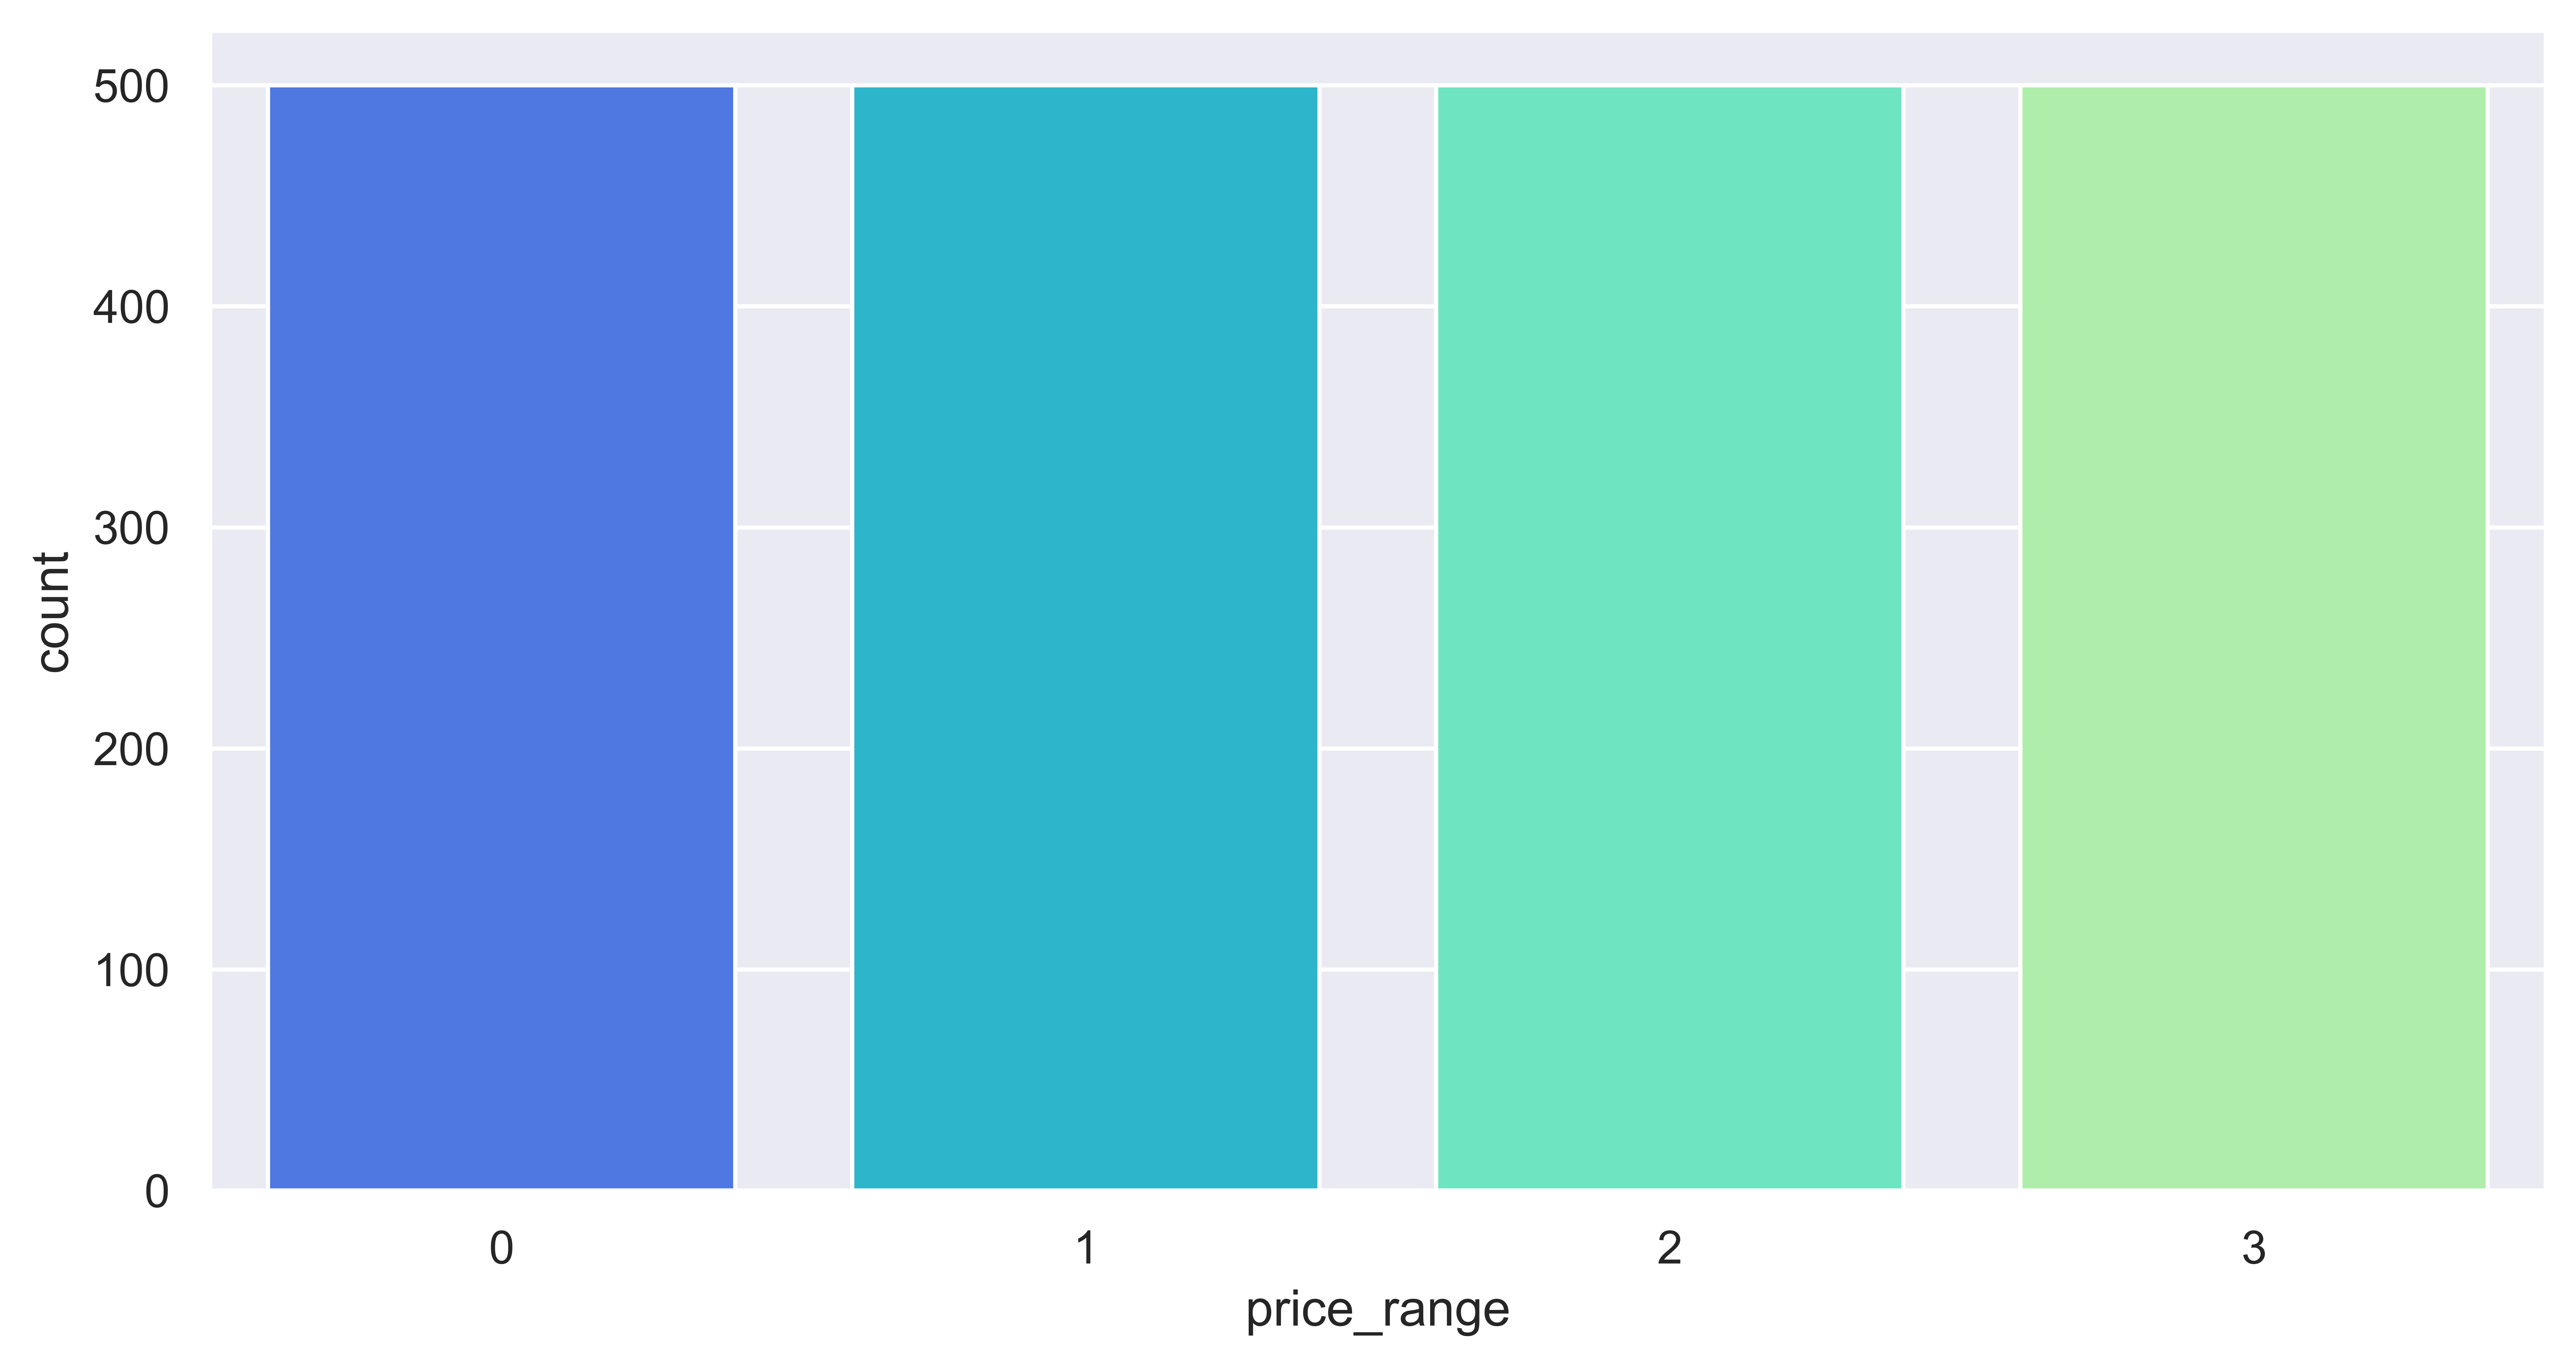

In [24]:
sns.countplot(x = df['price_range'])

In [25]:
df['price_range'].replace([0,1,2,3],['low','medium','high','very high'], inplace=True)

In [26]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,high
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,high
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,high
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,very high
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,low


In [ ]:
#Evaluate model

In [27]:
x = df.iloc[:,:-1]
y = df['price_range']

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [29]:
xtest

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,1034,0,2.6,1,2,1,45,0.3,190,3,4,182,1293,969,15,1,7,1,0,0
1699,1002,1,1.8,0,1,0,45,0.7,180,7,7,948,1007,1234,19,13,18,1,1,0
1282,609,1,0.5,0,4,1,10,0.1,81,6,6,113,1524,1905,16,3,18,1,1,1
1315,1510,0,0.6,1,1,0,32,0.7,135,3,8,963,1520,854,8,2,10,1,0,1
1210,805,1,1.7,1,0,1,58,0.9,168,3,10,81,1544,3397,7,6,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1266,0,1.9,1,0,1,7,0.2,184,3,12,346,1468,2532,10,5,4,1,1,1
763,1741,1,1.8,0,0,0,14,0.7,143,8,0,730,1895,3387,11,3,3,1,0,0
385,1880,1,1.8,0,4,1,18,0.7,138,3,5,71,699,3333,17,15,7,1,0,0
1667,1967,0,0.5,0,0,1,46,0.6,199,1,7,518,1374,1567,15,2,7,1,1,0


In [30]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)
yp = rfc.predict(xtest)

In [32]:
yp

array(['low', 'low', 'medium', 'low', 'very high', 'medium', 'low',
       'high', 'high', 'very high', 'low', 'very high', 'medium',
       'medium', 'very high', 'low', 'low', 'medium', 'medium', 'high',
       'very high', 'very high', 'medium', 'high', 'very high', 'high',
       'high', 'very high', 'high', 'high', 'high', 'medium', 'high',
       'low', 'very high', 'very high', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'high', 'medium', 'low', 'medium', 'high', 'high',
       'medium', 'high', 'high', 'very high', 'medium', 'very high',
       'high', 'very high', 'medium', 'very high', 'very high', 'medium',
       'low', 'high', 'medium', 'very high', 'high', 'medium', 'low',
       'high', 'very high', 'high', 'medium', 'high', 'low', 'very high',
       'very high', 'medium', 'high', 'medium', 'low', 'low', 'low',
       'very high', 'medium', 'high', 'very high', 'high', 'high', 'low',
       'medium', 'medium', 'very high', 'low', 'low', 'medium', 'high',
    

In [33]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

        high       0.81      0.87      0.84       106
         low       0.89      0.92      0.91        92
      medium       0.81      0.82      0.82        96
   very high       0.97      0.87      0.92       106

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [ ]:
#Try to visualize first 5 decision trees.

In [34]:
len(rfc.estimators_)

100

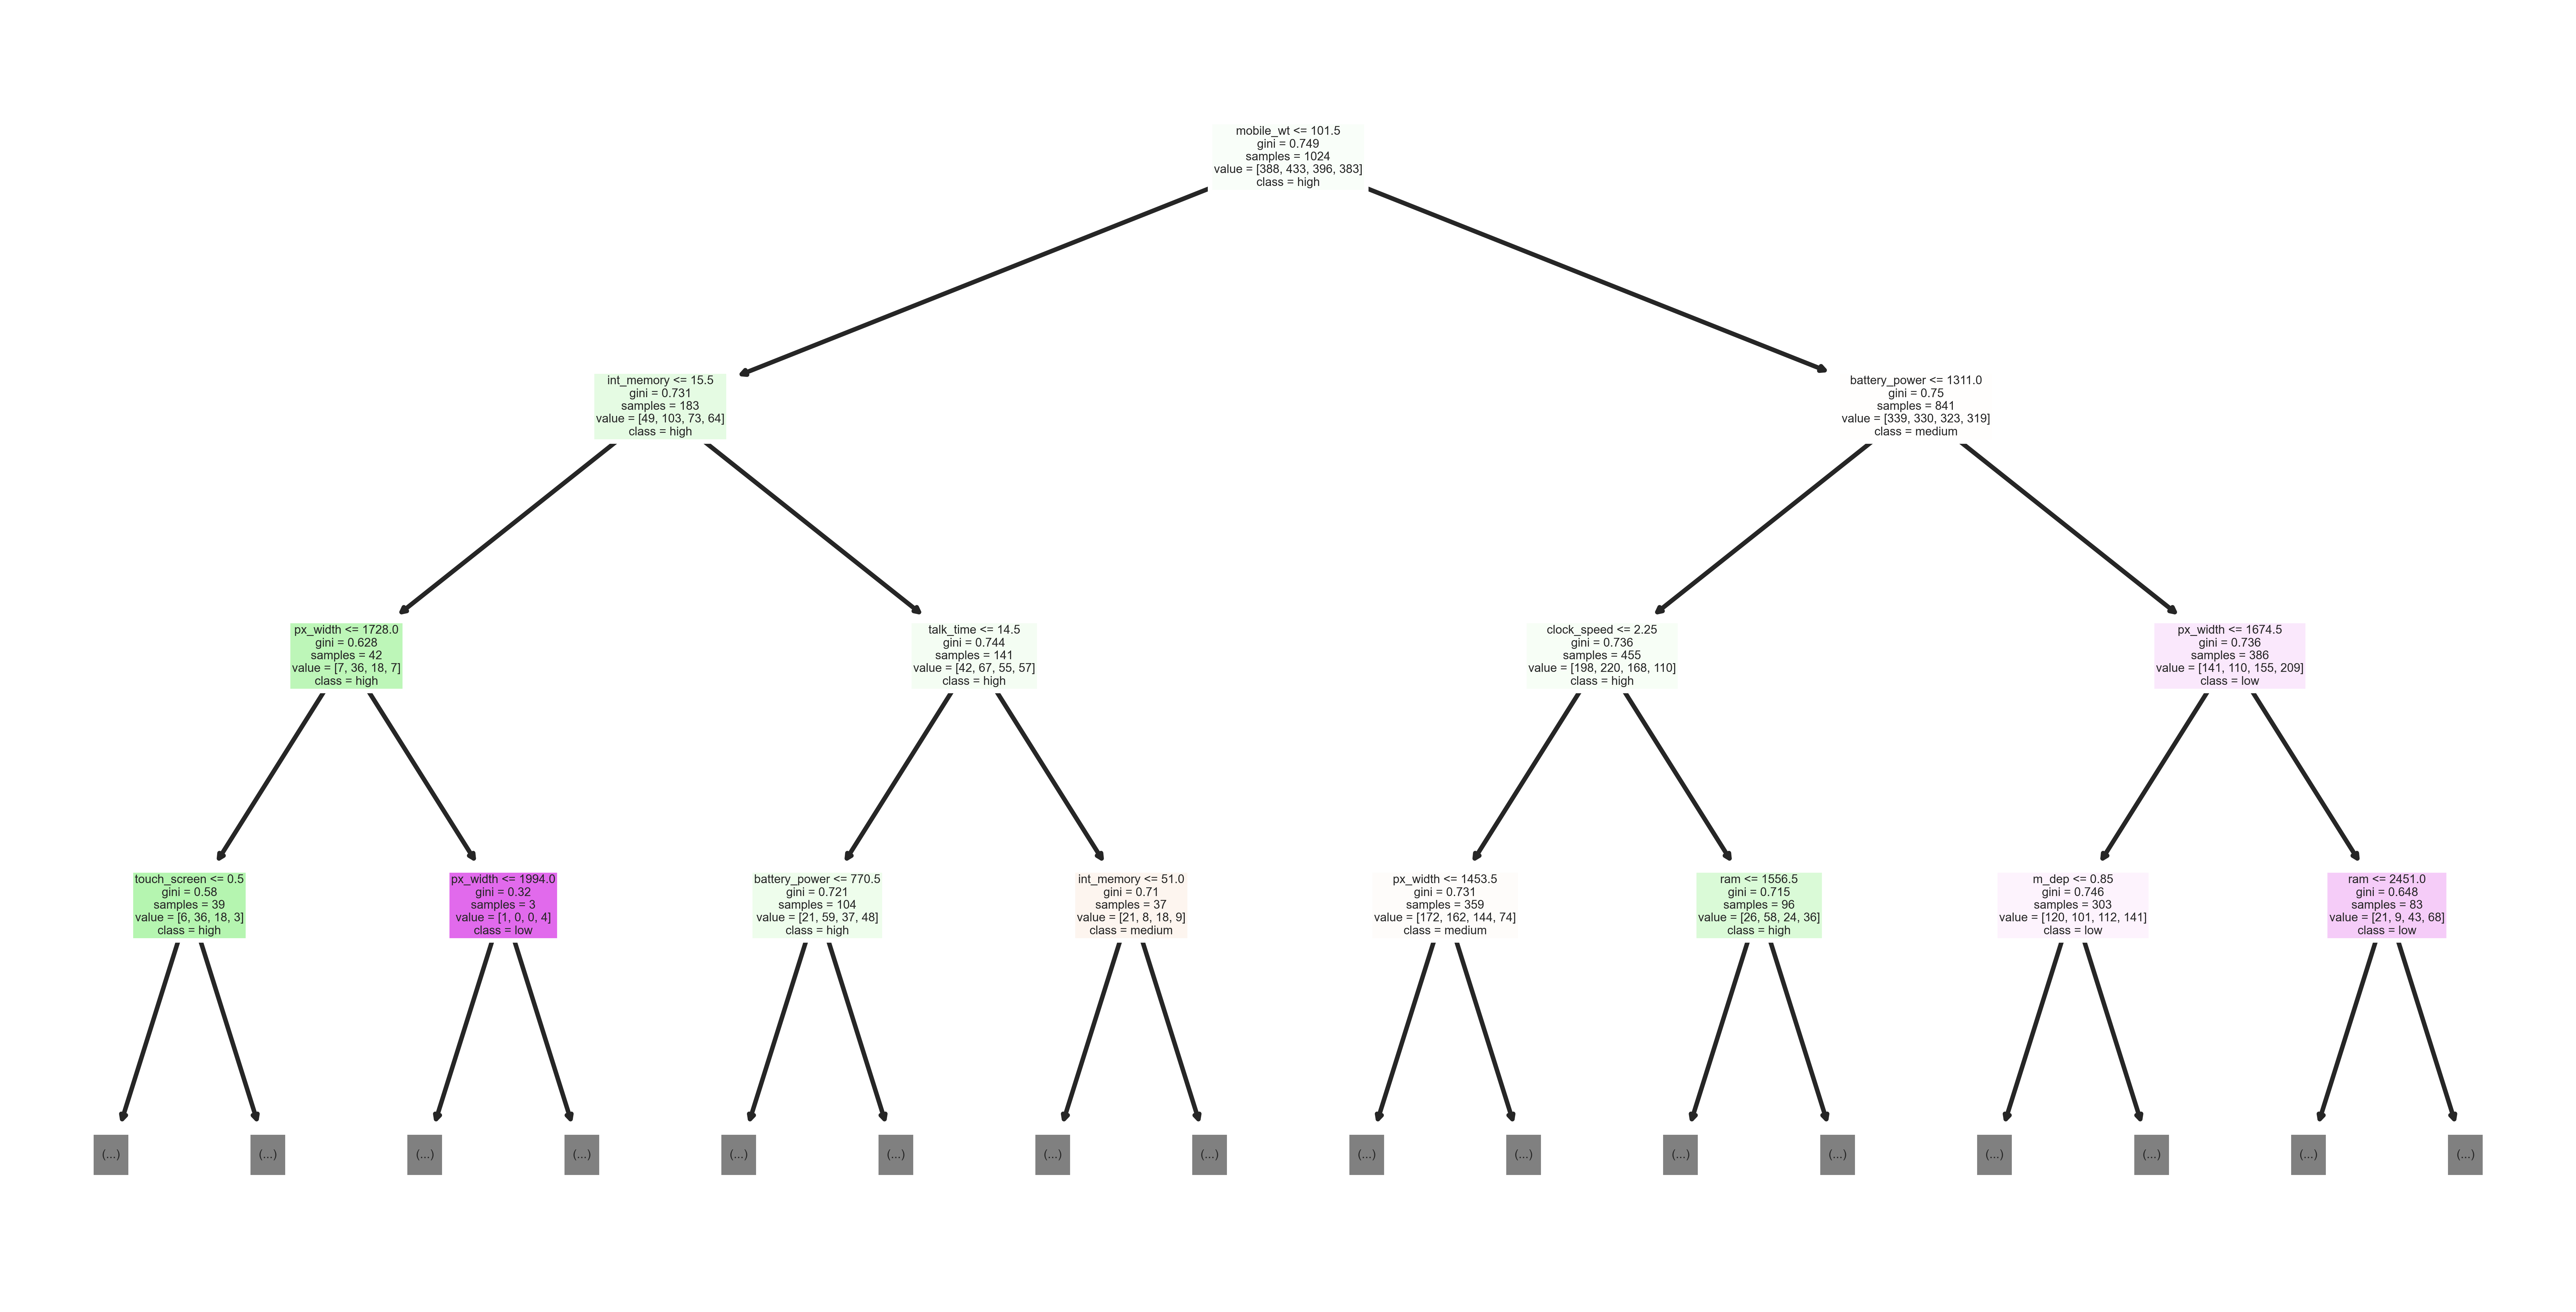

In [36]:
tree.plot_tree(rfc.estimators_[75], feature_names=x.columns,
               class_names=df['price_range'].unique(),
               filled=True , max_depth=3)
plt.show()